This notebook is for applying the models to the IEEE transaction data set that includes both valid and fraudulent transactions

Only the primary paper used the data set.  Will do feature engineering per the primary paper and apply it to as many of the models as possible.

1. Feature Engineering per the primary paper
2. Primary paper Enhanced Recall Model with Full Imbalanced Data
3. Primary paper Enhanced Recall Model with SMOTE oversampling of the minority class
4. Primary paper Enhanced Recall Model with under sampling of the majority class.
5. Primary paper Enhanced Recall Model using hyperparameters returned from Grid Search using Stratified 5 Fold Cross-Validation
6. Secondary paper Models with under sampling of the majority class
7. Secondary paper Models using SMOTE
8. Tertiary paper Models with a 10% random sample of imbalanced data
9. Tertiary paper Models using SMOTE

While this code is my own work the models used are implemented as described in:

Chung, Jiwon, and Kyung-Ho Lee. “Credit Card Fraud Detection: An Improved 
Strategy for High Recall Using KNN, LDA, and Linear Regression.” Sensors, 
vol. 23, no. 18, Sept. 2023, p. 7788. https://doi.org/10.3390/s2318778

Afriyie, Jonathan Kwaku, et al. “A Supervised 
Machine Learning Algorithm for Detecting and 
Predicting Fraud in Credit Card Transactions.” 
Decision Analytics Journal, vol. 6, Mar. 2023, p. 
100163. https://doi.org/10.1016/j.dajour.2023.100163.

Xia, Jianglin. “Credit Card Fraud Detection Based on 
Support Vector Machine.” Highlights in Science 
Engineering and Technology, vol. 23, Dec. 2022, pp. 
93–97. https://doi.org/10.54097/hset.v23

Dataset used:

https://www.kaggle.com/datasets/kartik2112/fraud-detection
202163.8.

Functions that define the various iteration of models:

In [2]:
import numpy as np

# Function to read dataset and return a dataframe.  Input the filename
def read_dataset(file_name):
    import pandas as pd

    # Concatenate the file name with the path to the project data directory
    file_path = '.\\data\\' + file_name

    # Load csv into a dataframe
    df = pd.read_csv(file_path)
    
    # Return the dataframe
    return df

# Function to check for null data
def has_null_values(df):
    return df.isnull().values.any()

# Function to lable encode the categorical features of a dataframe.
# Input the list of columns to be encoded.
def label_encode_dataset(categorical_features, df):
    from sklearn.preprocessing import LabelEncoder

    # Create a LabelEncoder instance
    label_encoder = LabelEncoder()


    # Apply label encoding to each column in the DataFrame
    for column in categorical_features:
        df.loc[:, column] = label_encoder.fit_transform(df.loc[:, column])
    
    return df

# Function to split the dataset into a features only and targets only dataframes
# Input dataframe to split, list of feature column names and list of target column names.
def split_features_target(df, feature_cols, target_col):
    # X is the features only dataframe.  Includes all but last column
    X = df[feature_cols]
    # y is the target dataframe
    y = df[target_col]
    
    return X, y

# Define the models used in the primary paper
def define_primary_models(features, targets):
    #Set up models
    from sklearn.model_selection import StratifiedKFold, cross_val_predict
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import accuracy_score, mean_squared_error

    # K-Nearest Neighbors (KNN) model with 5-fold stratified cross-validation
    # set hyperparameter values
    algorithm_val = 'auto'
    leaf_size_val = 30
    metric_val = 'minkowski'
    metric_params_val = None
    n_jobs_val = -1
    n_neighbors_val = 5
    p_val = 2
    weights_val = 'uniform'
    # define the knn model
    knn =  KNeighborsClassifier(n_neighbors=n_neighbors_val,
                                weights=weights_val,
                                algorithm=algorithm_val,
                                leaf_size=leaf_size_val,
                                metric=metric_val,
                                metric_params=metric_params_val,
                                p=p_val,
                                n_jobs=n_jobs_val
                                )
    # get predictions using stratified Kfold CV of 5
    p_knn = cross_val_predict(knn, features, targets, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
    
    # Linear Discriminant Analysis (LDA) model with 5-fold stratified cross-validation
    # set hyperparameter values
    covariance_estimator_val = None
    n_components_val = None
    priors_val = None
    shrinkage_val = None
    solver_val = 'svd'
    store_covariance_val = False
    tol_val = 0.0001
    # define the lDA Model
    lda = LinearDiscriminantAnalysis(solver=solver_val,
                                     shrinkage=shrinkage_val,
                                     priors=priors_val,
                                     n_components=n_components_val,
                                     store_covariance=store_covariance_val,
                                     tol=tol_val,
                                     covariance_estimator=covariance_estimator_val
                                    )
    # Get predictions with stratified kfold CV of 5
    p_lda = cross_val_predict(lda, features, targets, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

    # Linear Regression model with 5-fold cross-validation (not stratified for regression)
    lr = LinearRegression()
    p_lr = cross_val_predict(lr, features, targets, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
    
    return p_knn, p_lda, p_lr

# p_knn, p_lda, p_lr = validate_primary_models(X_smote, y_smote, X_test)
def validate_primary_models(features, targets, test):
    #Set up models
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import accuracy_score, mean_squared_error

    # K-Nearest Neighbors (KNN) model with 5-fold stratified cross-validation
    # set hyperparameter values
    algorithm_val = 'auto'
    leaf_size_val = 30
    metric_val = 'minkowski'
    metric_params_val = None
    n_jobs_val = -1
    n_neighbors_val = 5
    p_val = 2
    weights_val = 'uniform'
    # define the knn model
    knn =  KNeighborsClassifier(n_neighbors=n_neighbors_val,
                                weights=weights_val,
                                algorithm=algorithm_val,
                                leaf_size=leaf_size_val,
                                metric=metric_val,
                                metric_params=metric_params_val,
                                p=p_val,
                                n_jobs=n_jobs_val
                                )
    # train the model
    knn.fit(features, targets)

    # make predictions
    p_knn = knn.predict(test)
    
    # Linear Discriminant Analysis (LDA) model with 5-fold stratified cross-validation
    # set hyperparameter values
    covariance_estimator_val = None
    n_components_val = None
    priors_val = None
    shrinkage_val = None
    solver_val = 'svd'
    store_covariance_val = False
    tol_val = 0.0001
    # define the lDA Model
    lda = LinearDiscriminantAnalysis(solver=solver_val,
                                     shrinkage=shrinkage_val,
                                     priors=priors_val,
                                     n_components=n_components_val,
                                     store_covariance=store_covariance_val,
                                     tol=tol_val,
                                     covariance_estimator=covariance_estimator_val
                                    )
    # train the model
    lda.fit(features, targets)

    # make predictions
    p_lda = lda.predict(test)

    # Linear Regression model with 5-fold cross-validation (not stratified for regression)
    lr = LinearRegression()
    
    # train the model
    lr.fit(features, targets)

    # make predictions
    p_lr = lr.predict(test)
    
    return p_knn, p_lda, p_lr

# Use the parameters found from grid search
def define_primary_models_tuned(features, targets, test, best_knn_parms, best_lda_parms, best_lr_parms):
    #Set up models
    from sklearn.model_selection import StratifiedKFold, cross_val_predict
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import accuracy_score, mean_squared_error

    # K-Nearest Neighbors (KNN) model
    # set hyperparameter values {'algorithm': 'ball_tree', 'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
    algorithm_val = best_knn_parms['algorithm']
    leaf_size_val = best_knn_parms['leaf_size']
    metric_val = best_knn_parms['metric']
    #n_jobs_val = best_knn_parms['n_jobs']
    n_neighbors_val = best_knn_parms['n_neighbors']
    p_val = best_knn_parms['p']
    weights_val = best_knn_parms['weights']
    # define the knn model
    knn =  KNeighborsClassifier(n_neighbors=n_neighbors_val,
                                weights=weights_val,
                                algorithm=algorithm_val,
                                leaf_size=leaf_size_val,
                                metric=metric_val,
                                p=p_val#,
                                #n_jobs=n_jobs_val
                                )
    # Train and predict
    knn.fit(features, targets)
    p_knn = knn.predict(test)

    # Linear Discriminant Analysis (LDA) model
    # set hyperparameter values
    #  LDA: {'covariance_estimator': None, 'n_components': None, 'priors': None, 
    #    'shrinkage': 'auto', 'solver': 'eigen', 'store_covariance': True, 'tol': 0.0001}
    covariance_estimator_val = best_lda_parms['covariance_estimator']
    n_components_val = best_lda_parms['n_components']
    priors_val = best_lda_parms['priors']
    shrinkage_val = best_lda_parms['shrinkage']
    solver_val = best_lda_parms['solver']
    store_covariance_val = best_lda_parms['store_covariance']
    tol_val = best_lda_parms['tol']
    # define the lDA Model
    lda = LinearDiscriminantAnalysis(solver=solver_val,
                                     shrinkage=shrinkage_val,
                                     priors=priors_val,
                                     n_components=n_components_val,
                                     store_covariance=store_covariance_val,
                                     tol=tol_val,
                                     covariance_estimator=covariance_estimator_val
                                    )
    # train and predict
    lda.fit(features, targets)
    p_lda = lda.predict(test)

    # Linear Regression model
    lr = LinearRegression(copy_X= best_lr_parms['copy_X'], fit_intercept=best_lr_parms['fit_intercept'], 
                          positive=best_lr_parms['positive'])
    lr.fit(features, targets)
    p_lr = lr.predict(test)
    
    return p_knn, p_lda, p_lr

# Use the parameters found from grid search
def validate_primary_models_tuned(features, targets, test, best_knn_parms, best_lda_parms, best_lr_parms):
    #Set up models
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import accuracy_score, mean_squared_error

    # K-Nearest Neighbors (KNN) model with 5-fold stratified cross-validation
    # set hyperparameter values
    algorithm_val = best_knn_parms['algorithm']
    leaf_size_val = best_knn_parms['leaf_size']
    metric_val = best_knn_parms['metric']
    n_jobs_val = best_knn_parms['n_jobs']
    n_neighbors_val = best_knn_parms['n_neighbors']
    p_val = best_knn_parms['p']
    weights_val = best_knn_parms['weights']
    # define the knn model
    knn =  KNeighborsClassifier(n_neighbors=n_neighbors_val,
                                weights=weights_val,
                                algorithm=algorithm_val,
                                leaf_size=leaf_size_val,
                                metric=metric_val,
                                p=p_val,
                                n_jobs=n_jobs_val
                                )
    # train the model
    knn.fit(features, targets)

    # get predictions
    p_knn = knn.predict(test)
    
    # Linear Discriminant Analysis (LDA) model with 5-fold stratified cross-validation
    # set hyperparameter values
    #  LDA: {'covariance_estimator': None, 'n_components': None, 'priors': None, 
    #    'shrinkage': 'auto', 'solver': 'eigen', 'store_covariance': True, 'tol': 0.0001}
    covariance_estimator_val = best_lda_parms['covariance_estimator']
    n_components_val = best_lda_parms['n_components']
    priors_val = best_lda_parms['priors']
    shrinkage_val = best_lda_parms['shrinkage']
    solver_val = best_lda_parms['solver']
    store_covariance_val = best_lda_parms['store_covariance']
    tol_val = best_lda_parms['tol']
    # define the lDA Model
    lda = LinearDiscriminantAnalysis(solver=solver_val,
                                     shrinkage=shrinkage_val,
                                     priors=priors_val,
                                     n_components=n_components_val,
                                     store_covariance=store_covariance_val,
                                     tol=tol_val,
                                     covariance_estimator=covariance_estimator_val
                                    )
    # train the model
    lda.fit(features, targets)

    # get predictions
    p_lda = lda.predict(test)
   
    # Linear Regression model with 5-fold cross-validation (not stratified for regression)
    # Linear Regression: {'copy_X': True, 'fit_intercept': False, 'positive': True}
    lr = LinearRegression(copy_X= best_lr_parms['copy_X'], fit_intercept=best_lr_parms['fit_intercept'], 
                          positive=best_lr_parms['positive'])
    
    # train the model
    lr.fit(features, targets)

    # get predictions
    p_lr = lr.predict(test)
      
    return p_knn, p_lda, p_lr

# Define the models used in the primary paper
def define_secondary_models(features, targets, test_features):

    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    
    # Create a Decision Tree, Random Forest and Logistic Regression models
    dt = DecisionTreeClassifier(random_state=42)
    rf = RandomForestClassifier(random_state=42)
    log_r = LogisticRegression(class_weight='balanced', C=0.1, penalty='l2')#random_state=42)
                               
    # Train the models on the training data
    dt.fit(features, targets)
    rf.fit(features, targets)
    log_r.fit(features, targets)                                                           

    # Make predictions on the test data
    p_dt = dt.predict(test_features)
    p_rf = rf.predict(test_features)
    p_log_r = log_r.predict(test_features)
                               
    return p_dt, p_rf, p_log_r

# Define the models used in the tertiary paper
def define_tertiary_models(features, targets, test_features, hyperparameters):
    from sklearn.svm import SVC
        
    svm = SVC(**hyperparameters)
    svm.fit(features, targets)
    p_svm = svm.predict(test_features) 
    
    return p_svm


# Algorithm used in the primary paper to enhnace recall
def enhanced_recall(p_knn, p_lda, p_lr, mv_lr):
    import numpy as np
    
    # determine the size of the dataset
    data_length = len(p_knn)
    # initialize an array of zeros
    p_or = np.zeros([data_length])
    
    # Iterate through rows using index positions
    for i in range(data_length):
        if (p_knn[i]==0 or p_lda[i] == 0) and p_lr[i] < mv_lr:
            p_or[i] = 0
        elif (p_knn[i]==1 or p_lda[i] == 1) and p_lr[i] > mv_lr:
            p_or[i] = 1
        else:
            p_or[i] = p_knn[i]

    return p_or

# function to provide classifier metrics
# input true and predicted label sets
def calculate_classifier_metrics(true_labels, predicted_labels):
    from sklearn.metrics import precision_recall_fscore_support, accuracy_score
    # Calculate model accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)
    # Calculate precision, recall, and F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='binary')
    
    return precision, recall, f1, accuracy

def get_classifcation_report(true_labels, predicted_labels, name):
    from sklearn.metrics import classification_report
    from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    import matplotlib.pyplot as plt
    
    cm_report = classification_report(true_labels, predicted_labels)
    #print(cm_report)
    
    cm = confusion_matrix(true_labels, predicted_labels)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    cm_display.ax_.set_title(name)
    plt.show()

    return cm_report

# function to provide regression metrics
# input true and predicted label sets
def calculate_regression_metrics(true_labels, predicted_labels):
    from sklearn.metrics import accuracy_score, mean_squared_error
    # Calculate mean squared error
    mse = mean_squared_error(true_labels, predicted_labels)
    
    return mse

# Function to do a hyper-parameter grid search for KNN
def get_best_knn_parms(X_train, y_train):
    from sklearn.model_selection import GridSearchCV, StratifiedKFold
    from sklearn.neighbors import KNeighborsClassifier
    # Used in the primary paper
    # algorithm_val = 'auto'
    # leaf_size_val = 30
    # metric_val = 'minkowski'
    # metric_params_val = None
    # n_jobs_val = -1
    # n_neighbors_val = 5
    # p_val = 2
    # weights_val = 'uniform'
    #hyper_params = {'n_neighbors': [3, 5, 7, 9, 11],
    #                'weights': ['uniform', 'distance'],
    #                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    #                'leaf_size': [10, 20, 30, 40, 50],
    #                'p': [1, 2],
    #                'metric': ['euclidean', 'manhattan', 'minkowski'],
    #                'n_jobs': [-1, 1] }
    # Reducing parameters due to long grid search run time.
    # Documented params include:
    #algorithm_val = 'auto'
    #leaf_size_val = 30
    #metric_val = 'minkowski'
    #metric_params_val = None
    #n_jobs_val = -1
    #n_neighbors_val = 5
    #p_val = 2
    #weights_val = 'uniform'
    hyper_params = {'n_neighbors': [3, 5, 7],
                    'weights': ['uniform', 'distance'],
                    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'leaf_size': [20, 30, 40],
                    'p': [1, 2],
                    'metric': ['euclidean', 'manhattan', 'minkowski']}
    
    
    knn = KNeighborsClassifier()
    stratified_cv = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(knn, hyper_params, cv=stratified_cv)
    grid_search.fit(X_train, y_train)

    return grid_search.best_params_    

# Function to do a hyper-paramter grid search for LDA    
def get_best_lda_parms(X_train, y_train):    
    
    #  From Primary paper
    #covariance_estimator_val = None
    #n_components_val = None
    #priors_val = None
    #shrinkage_val = None
    #solver_val = 'svd'
    #store_covariance_val = False
    #tol_val = 0.0001
    
    from sklearn.model_selection import GridSearchCV, StratifiedKFold
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    
    hyper_params = {'solver': ['svd', 'lsqr', 'eigen'],
                    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],  # Only applicable for 'lsqr' and 'eigen' solvers
                    'priors': [None],  # Prior probabilities of the classes (usually None for estimation from data)
                    'n_components': [None],  # Number of components (if None, it will be automatically determined)
                    'tol': [1e-4, 1e-3, 1e-2],  # Tolerance to declare convergence
                    'covariance_estimator': [None],
                    'store_covariance': [True, False]  # Whether to store the covariance matrix during training
                 }
    
    lda = LinearDiscriminantAnalysis()
    stratified_cv = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(lda, hyper_params, cv=stratified_cv)
    grid_search.fit(X_train, y_train)

    return grid_search.best_params_    

# Function to do a hyper-parameter grid search for Linear Regression
def get_best_lr_parms(X_train, y_train):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import GridSearchCV, StratifiedKFold

    hyper_params = {'fit_intercept': [True, False],
                    'copy_X': [True, False], 
                    'positive': [True, False]}

    lr = LinearRegression()
    stratified_cv = StratifiedKFold(n_splits=5)   
    grid_search = GridSearchCV(lr, hyper_params, cv=stratified_cv, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    return grid_search.best_params_

def plot_roc(y_preds, model_names):
    # Generate predictions for each model (assuming y_test and y_pred_proba are available for each model)
    from sklearn.metrics import roc_curve, auc
    
    # Plot ROC curve for each model
    plt.figure(figsize=(8, 6))  # Set plot size
    for y_pred, model_name in zip(y_preds, model_names):
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
      
    # Plot random classifier (diagonal line)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
    
    # Set labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    
    # Show plot
    plt.show()


Feature Engineering of the data according to the primary paper, which just requires label encoding categorical data.

Are there any null values in the training data? -  False


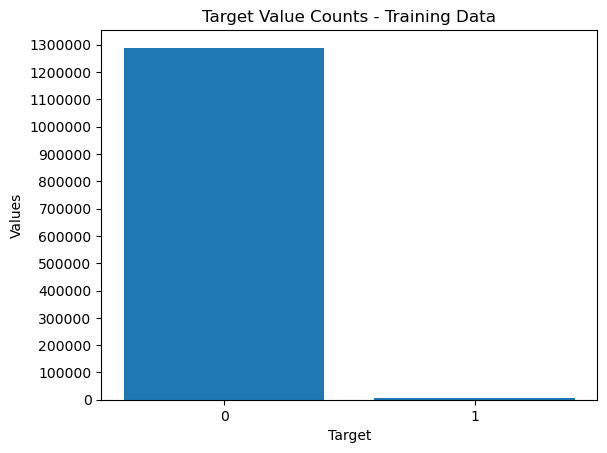

Are there any null values in the test data? -  False


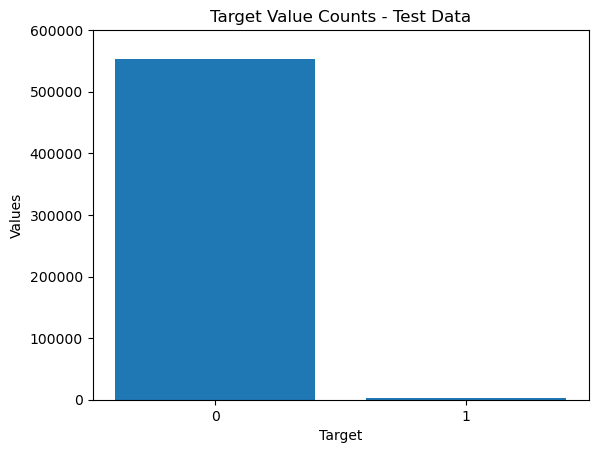

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Read the Shenoy dataset
df = read_dataset('FraudTrain.csv')

features = ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num',
            'unix_time', 'merch_lat', 'merch_long']
target = 'is_fraud'
category_features = ['street', 'job', 'merchant', 'category', 'first', 'last', 'gender', 'trans_num',
                     'dob', 'trans_date_trans_time', 'city', 'state']   

# Check for any null data
any_nulls = df.isnull().any().any()
print("Are there any null values in the training data? - ", any_nulls)

# Split the dataframes into features and target dataframes
X_train, y_train = split_features_target(df, features, target)

# Label Encode the Categorical Data
X_train = label_encode_dataset(category_features, X_train)    

# Scale the features
#scaler = StandardScaler()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

fraud_counts = y_train.value_counts()

# Creating the bar plot
plt.bar(fraud_counts.index, fraud_counts.values)
plt.xticks(fraud_counts.index, ['0', '1'])
plt.yticks(range(0, 1300001, 100000), [str(i) for i in range(0, 1300001, 100000)])
plt.title('Target Value Counts - Training Data')
plt.xlabel('Target')
plt.ylabel('Values')

# Displaying the plot
plt.show()

# Read in the test data
df_test = read_dataset('FraudTest.csv')

# Check for any null data
any_nulls = df.isnull().any().any()
print("Are there any null values in the test data? - ", any_nulls)


# Split features and target
X_test, y_test = split_features_target(df_test, features, target)

fraud_counts_test = y_test.value_counts()

# Label Encode the Categorical Data
X_test = label_encode_dataset(category_features, X_test)    

# Scale the features
X_test = scaler.fit_transform(X_test)

plt.bar(fraud_counts.index, fraud_counts_test.values)
plt.xticks(fraud_counts_test.index, ['0', '1'])
plt.yticks(range(0, 600001, 100000), [str(i) for i in range(0, 600001, 100000)])
plt.title('Target Value Counts - Test Data')
plt.xlabel('Target')
plt.ylabel('Values')

# Displaying the plot
plt.show()

In [5]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [6]:
df_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


Feature Engineering is complete training and testing data is ready

First iteration of models:  Primary paper's Enhanced Recall Ensemble model using imbalanced data

Training Data Evaluation
Scores with Full Imbalanced Data using Documented Model and Hyperparameters
Uses Stratified 5 Fold Cross-Validation


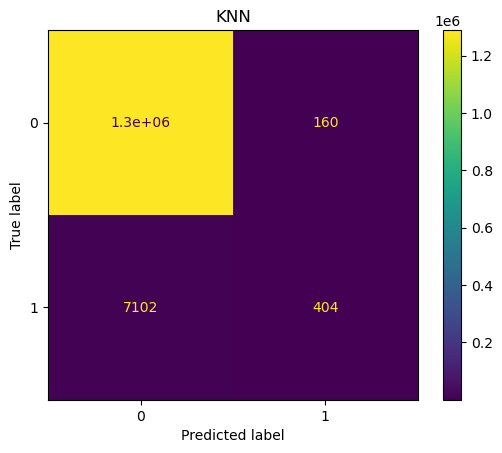

              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1289169
           1       0.72      0.05      0.10      7506

    accuracy                           0.99   1296675
   macro avg       0.86      0.53      0.55   1296675
weighted avg       0.99      0.99      0.99   1296675



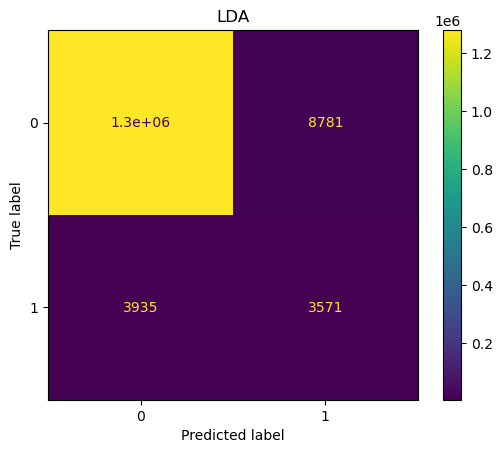

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1289169
           1       0.29      0.48      0.36      7506

    accuracy                           0.99   1296675
   macro avg       0.64      0.73      0.68   1296675
weighted avg       0.99      0.99      0.99   1296675



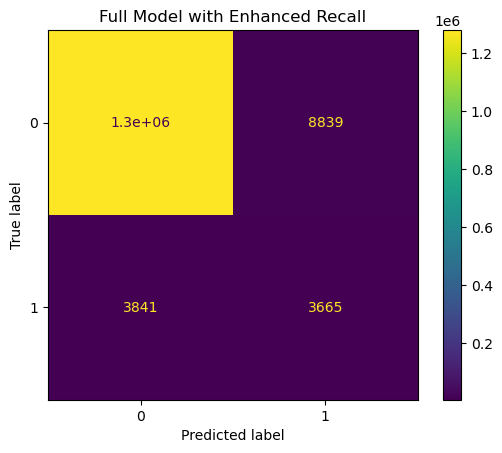

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1289169
           1       0.29      0.49      0.37      7506

    accuracy                           0.99   1296675
   macro avg       0.65      0.74      0.68   1296675
weighted avg       0.99      0.99      0.99   1296675


Test Data Evaluation
Scores with Full Imbalanced Data using Documented Model and Hyperparameters
Models Trained with Complete Training Dataset.  Predictions Made with Test Dataset


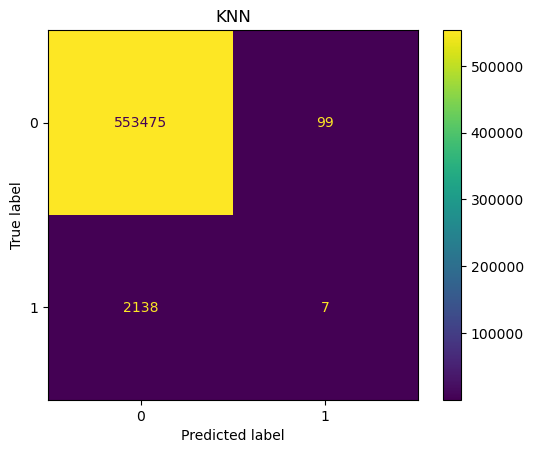

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.07      0.00      0.01      2145

    accuracy                           1.00    555719
   macro avg       0.53      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



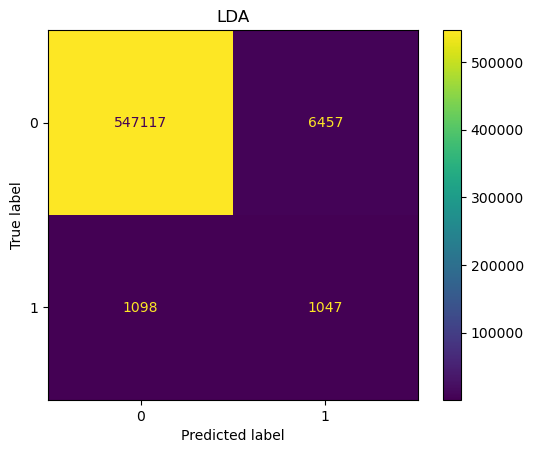

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.14      0.49      0.22      2145

    accuracy                           0.99    555719
   macro avg       0.57      0.74      0.61    555719
weighted avg       0.99      0.99      0.99    555719



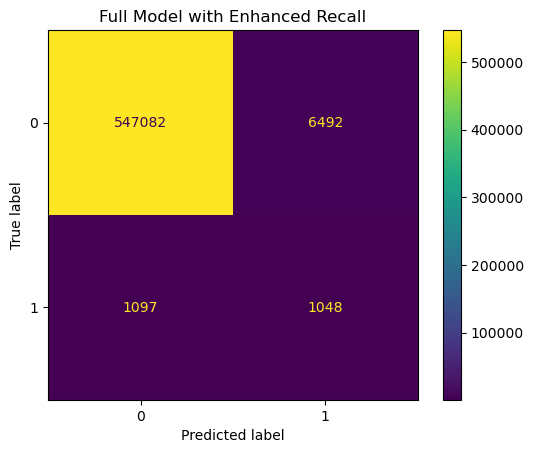

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.14      0.49      0.22      2145

    accuracy                           0.99    555719
   macro avg       0.57      0.74      0.60    555719
weighted avg       0.99      0.99      0.99    555719



In [6]:
# Create and train the ML models
p_knn, p_lda, p_lr = define_primary_models(X_train_scaled, y_train)

# Apply the enhanced recall logic
p_er = enhanced_recall(p_knn, p_lda, p_lr, p_lr.mean())

# Training data eval
print("Training Data Evaluation")
print("Scores with Full Imbalanced Data using Documented Model and Hyperparameters")
print('Uses Stratified 5 Fold Cross-Validation')
cm_report = get_classifcation_report(y_train, p_knn, 'KNN')
print(cm_report)


cm_report = get_classifcation_report(y_train, p_lda, 'LDA')
print(cm_report)

cm_report = get_classifcation_report(y_train, p_er, 'Full Model with Enhanced Recall')
print(cm_report)        

# validate on test data
p_knn, p_lda, p_lr = validate_primary_models(X_train_scaled, y_train, X_test)
p_er = enhanced_recall(p_knn, p_lda, p_lr, p_lr.mean())

# test data eval
print("\nTest Data Evaluation")
print("Scores with Full Imbalanced Data using Documented Model and Hyperparameters")
print('Models Trained with Complete Training Dataset.  Predictions Made with Test Dataset')

cm_report = get_classifcation_report(y_test, p_knn, 'KNN')
print(cm_report)


cm_report = get_classifcation_report(y_test, p_lda, 'LDA')
print(cm_report)

cm_report = get_classifcation_report(y_test, p_er, 'Full Model with Enhanced Recall')
print(cm_report)               

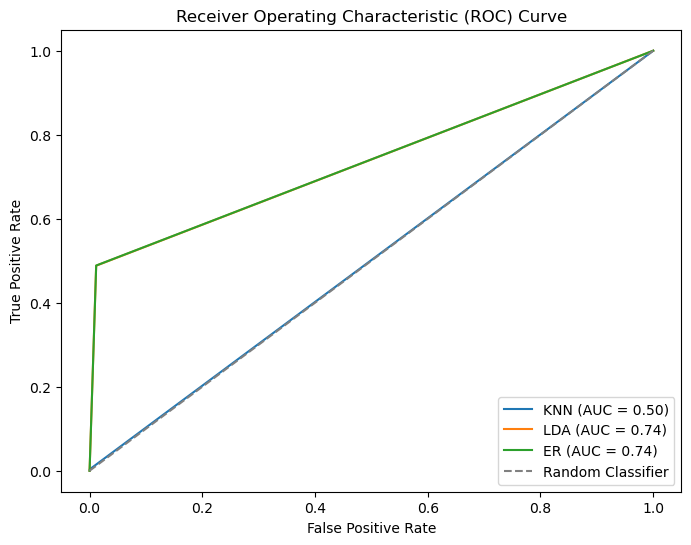

In [7]:
p_mods = [p_knn, p_lda, p_er]
mnames = ['KNN', 'LDA', 'ER']
plot_roc(p_mods, mnames)

Second iteration:  Primary paper's Enhanced Recall model using SMOTE oversampling of the minority class to improve accuraccy by dealing with the imbalanced data.

After the Application of SMOTE Oversampling of the Minority Class:
Number of Rows Features: 500000
Number of Rows Fraud: 250148
Number of Rows Not Fraud: 249852
Training Data Evaluation
Scores after the Application of SMOTE Oversampling of the Minority Class using Documented Model and Hyperparameters
Uses 5 Fold Cross-Validation


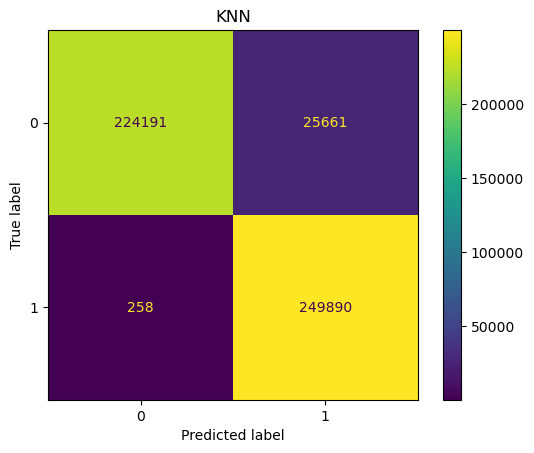

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    249852
           1       0.91      1.00      0.95    250148

    accuracy                           0.95    500000
   macro avg       0.95      0.95      0.95    500000
weighted avg       0.95      0.95      0.95    500000



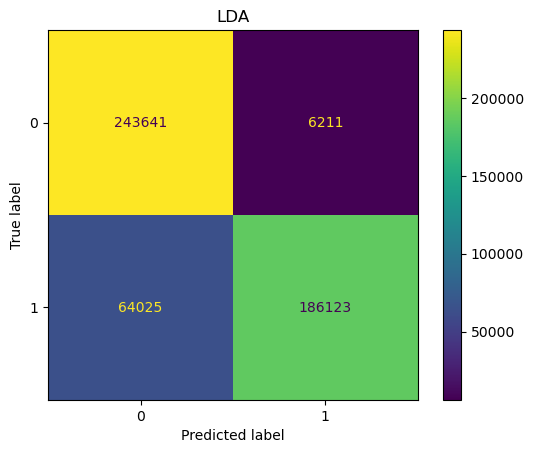

              precision    recall  f1-score   support

           0       0.79      0.98      0.87    249852
           1       0.97      0.74      0.84    250148

    accuracy                           0.86    500000
   macro avg       0.88      0.86      0.86    500000
weighted avg       0.88      0.86      0.86    500000



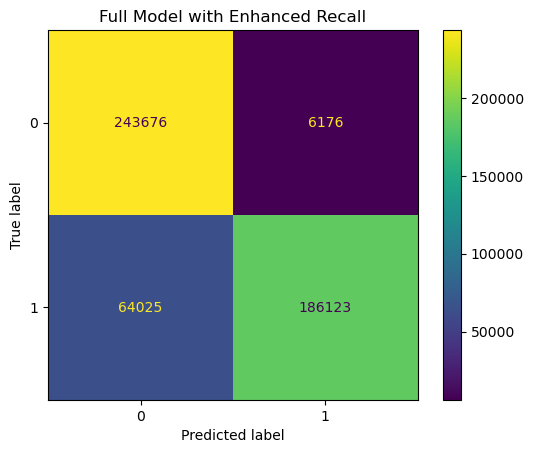

              precision    recall  f1-score   support

           0       0.79      0.98      0.87    249852
           1       0.97      0.74      0.84    250148

    accuracy                           0.86    500000
   macro avg       0.88      0.86      0.86    500000
weighted avg       0.88      0.86      0.86    500000


Test Data Evaluation
Scores after the Application of SMOTE Oversampling of the Minority Class using Documented Model and Hyperparameters
Models Trained with Complete Training Dataset.  Predictions Made with Test Dataset


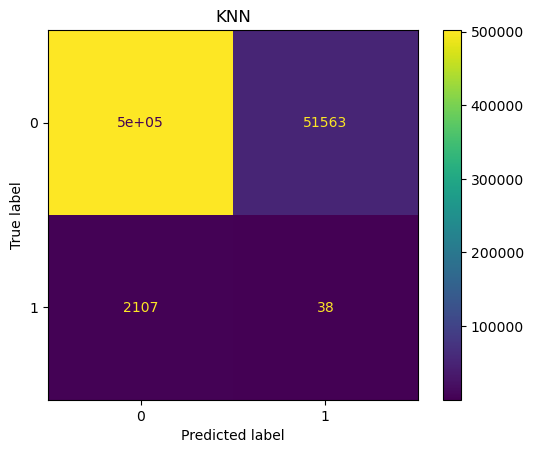

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    553574
           1       0.00      0.02      0.00      2145

    accuracy                           0.90    555719
   macro avg       0.50      0.46      0.48    555719
weighted avg       0.99      0.90      0.95    555719



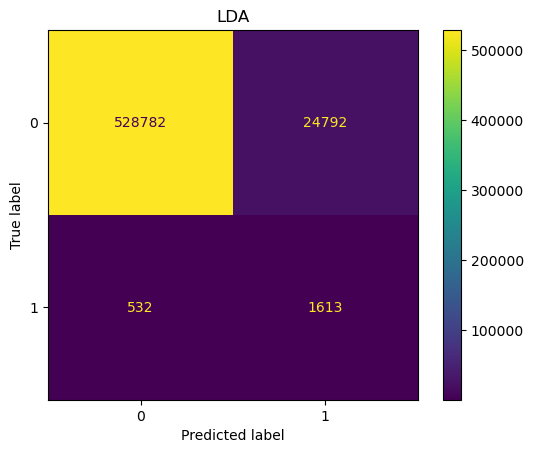

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.06      0.75      0.11      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.85      0.54    555719
weighted avg       1.00      0.95      0.97    555719



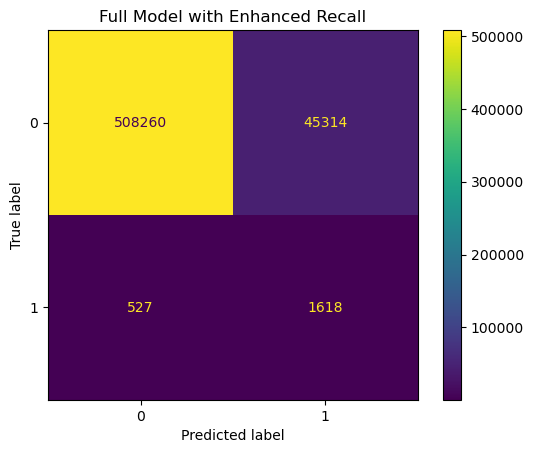

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    553574
           1       0.03      0.75      0.07      2145

    accuracy                           0.92    555719
   macro avg       0.52      0.84      0.51    555719
weighted avg       1.00      0.92      0.95    555719



In [8]:
from imblearn.over_sampling import SMOTE
import numpy as np

# SMOTE Oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
#X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

# Now that both classes have been equalized, scale down the dataset to prevent overfitting
subset_size = 500000  # Specify the desired size of the subset
#X_smote = X_smote.sample(n=subset_size, random_state=42)
#y_smote = y_smote[X_smote.index]
num_rows = X_smote.shape[0]

# Generate random indices for selecting a random sample
random_indices = np.random.choice(num_rows, size=subset_size, replace=False)

# Select the random sample from X_train and y_train using the random indices
X_smote = X_smote[random_indices]
y_smote = y_smote[random_indices]


# Scale the SMOTE X_train data
#X_smote = scaler.fit_transform(X_smote)

print("After the Application of SMOTE Oversampling of the Minority Class:")
print("Number of Rows Features:", len(X_smote))
print("Number of Rows Fraud:",(y_smote == 1).sum())
print("Number of Rows Not Fraud:", (y_smote == 0).sum())

# Create and train the ML models
p_knn, p_lda, p_lr = define_primary_models(X_smote, y_smote)    

# Apply the enhanced recall logic
p_er = enhanced_recall(p_knn, p_lda, p_lr, p_lr.mean())

# Evalute
print("Training Data Evaluation")
print("Scores after the Application of SMOTE Oversampling of the Minority Class using Documented Model and Hyperparameters")
print('Uses 5 Fold Cross-Validation')
cm_report = get_classifcation_report(y_smote, p_knn, 'KNN')
print(cm_report)

cm_report = get_classifcation_report(y_smote, p_lda, 'LDA')
print(cm_report)

cm_report = get_classifcation_report(y_smote, p_er, 'Full Model with Enhanced Recall')
print(cm_report)

# validate on test data
p_knn, p_lda, p_lr = validate_primary_models(X_smote, y_smote, X_test)
p_er = enhanced_recall(p_knn, p_lda, p_lr, p_lr.mean())

# test data eval
print("\nTest Data Evaluation")
print("Scores after the Application of SMOTE Oversampling of the Minority Class using Documented Model and Hyperparameters")
print('Models Trained with Complete Training Dataset.  Predictions Made with Test Dataset')
cm_report = get_classifcation_report(y_test, p_knn, 'KNN')
print(cm_report)


cm_report = get_classifcation_report(y_test, p_lda, 'LDA')
print(cm_report)

cm_report = get_classifcation_report(y_test, p_er, 'Full Model with Enhanced Recall')
print(cm_report)         


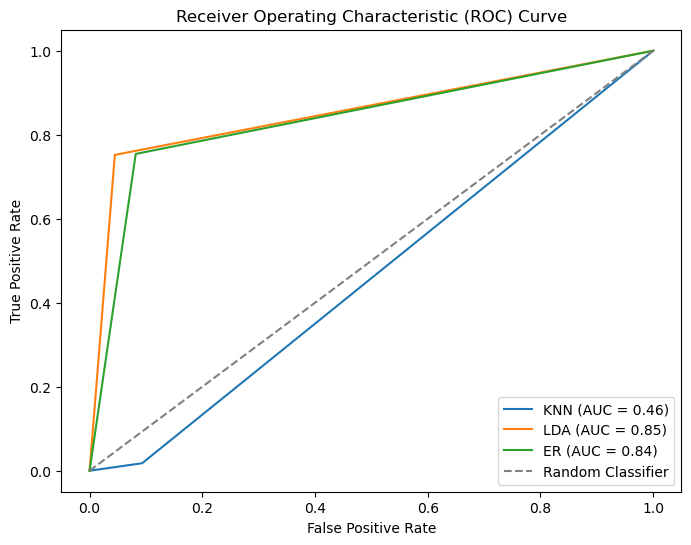

In [9]:
p_mods = [p_knn, p_lda, p_er]
mnames = ['KNN', 'LDA', 'ER']
plot_roc(p_mods, mnames)

Third Iteration:  Primary Paper's model using under sampling of the majority class

After Under sampling of the Majority Class:
Number of Rows Features: 15012
Number of Rows Fraud: 7506
Number of Rows Not Fraud: 7506

Training Data Evaluation
Scores after the Application of under sampling of the Majority Class using Documented Model and Hyperparameters
Uses 5 Fold Cross-Validation


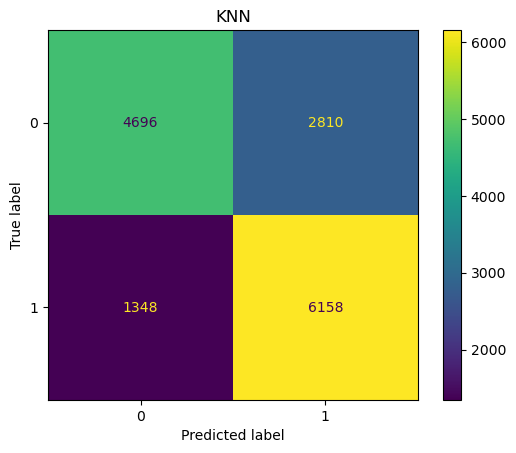

              precision    recall  f1-score   support

           0       0.78      0.63      0.69      7506
           1       0.69      0.82      0.75      7506

    accuracy                           0.72     15012
   macro avg       0.73      0.72      0.72     15012
weighted avg       0.73      0.72      0.72     15012



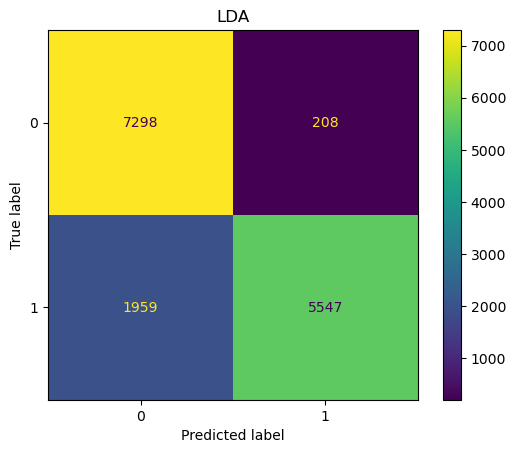

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      7506
           1       0.96      0.74      0.84      7506

    accuracy                           0.86     15012
   macro avg       0.88      0.86      0.85     15012
weighted avg       0.88      0.86      0.85     15012



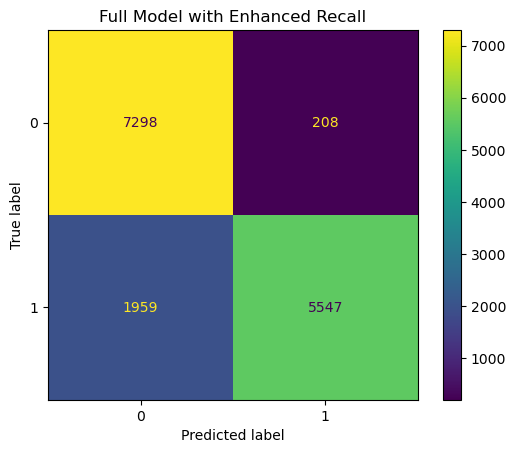

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      7506
           1       0.96      0.74      0.84      7506

    accuracy                           0.86     15012
   macro avg       0.88      0.86      0.85     15012
weighted avg       0.88      0.86      0.85     15012


Test Data Evaluation
Scores after training the models using Under sampling of the Majority Class using Documented Model and Hyperparameters


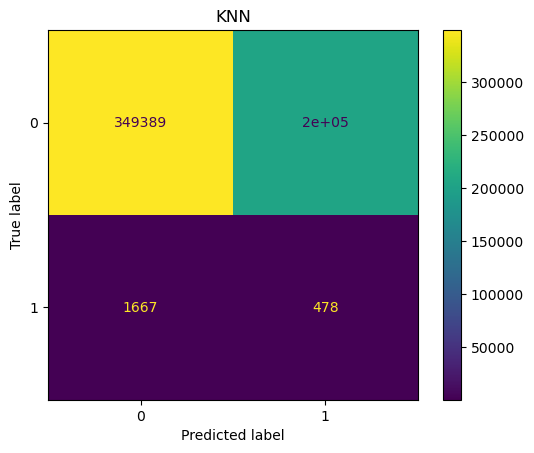

              precision    recall  f1-score   support

           0       1.00      0.63      0.77    553574
           1       0.00      0.22      0.00      2145

    accuracy                           0.63    555719
   macro avg       0.50      0.43      0.39    555719
weighted avg       0.99      0.63      0.77    555719



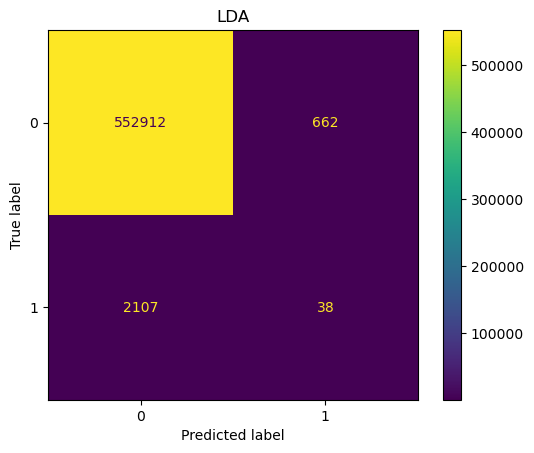

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.05      0.02      0.03      2145

    accuracy                           1.00    555719
   macro avg       0.53      0.51      0.51    555719
weighted avg       0.99      1.00      0.99    555719



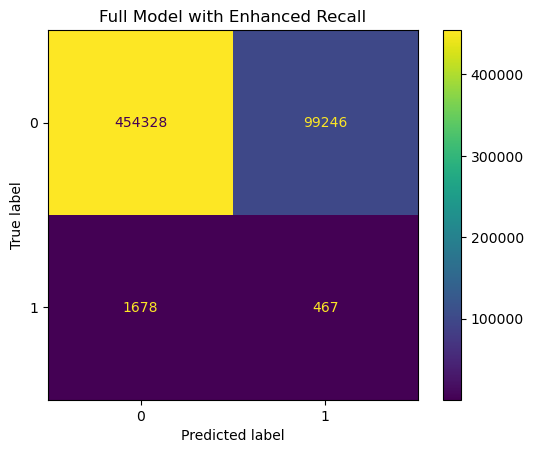

              precision    recall  f1-score   support

           0       1.00      0.82      0.90    553574
           1       0.00      0.22      0.01      2145

    accuracy                           0.82    555719
   macro avg       0.50      0.52      0.45    555719
weighted avg       0.99      0.82      0.90    555719



In [10]:
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

# Repeat using Undersampling on the majority class
minority_class = df[df[target]== 1]
majority_class = df[df[target]== 0]
desired_samples = len(minority_class)
undersampled_majority_class = resample(majority_class, replace=False, n_samples=desired_samples, random_state=42)

# create undersampled dataset
df_u = pd.concat([minority_class, undersampled_majority_class])

# Split the dataframes into a features and target dataframes
X_train_u, y_train_u = split_features_target(df_u, features, target)

print("After Under sampling of the Majority Class:")
print("Number of Rows Features:", len(X_train_u))
print("Number of Rows Fraud:",(y_train_u == 1).sum())
print("Number of Rows Not Fraud:", (y_train_u == 0).sum())

# label encode data
X_train_u = label_encode_dataset(category_features, X_train_u)    

# scale data
scaler = MinMaxScaler()
X_train_u = scaler.fit_transform(X_train_u)

# Create and train the ML models
p_knn, p_lda, p_lr = define_primary_models(X_train_u, y_train_u)    

# Apply the enhanced recall logic
p_er = enhanced_recall(p_knn, p_lda, p_lr, p_lr.mean())

# Evalute
print("\nTraining Data Evaluation")
print("Scores after the Application of under sampling of the Majority Class using Documented Model and Hyperparameters")
print('Uses 5 Fold Cross-Validation')
cm_report = get_classifcation_report(y_train_u, p_knn, 'KNN')
print(cm_report)

cm_report = get_classifcation_report(y_train_u, p_lda, 'LDA')
print(cm_report)

cm_report = get_classifcation_report(y_train_u, p_er, 'Full Model with Enhanced Recall')
print(cm_report)

# validate on test data
p_knn, p_lda, p_lr = validate_primary_models(X_train_u, y_train_u, X_test)
p_er = enhanced_recall(p_knn, p_lda, p_lr, p_lr.mean())

# test data eval
print("\nTest Data Evaluation")
print("Scores after training the models using Under sampling of the Majority Class using Documented Model and Hyperparameters")

cm_report = get_classifcation_report(y_test, p_knn, 'KNN')
print(cm_report)


cm_report = get_classifcation_report(y_test, p_lda, 'LDA')
print(cm_report)

cm_report = get_classifcation_report(y_test, p_er, 'Full Model with Enhanced Recall')
print(cm_report)         


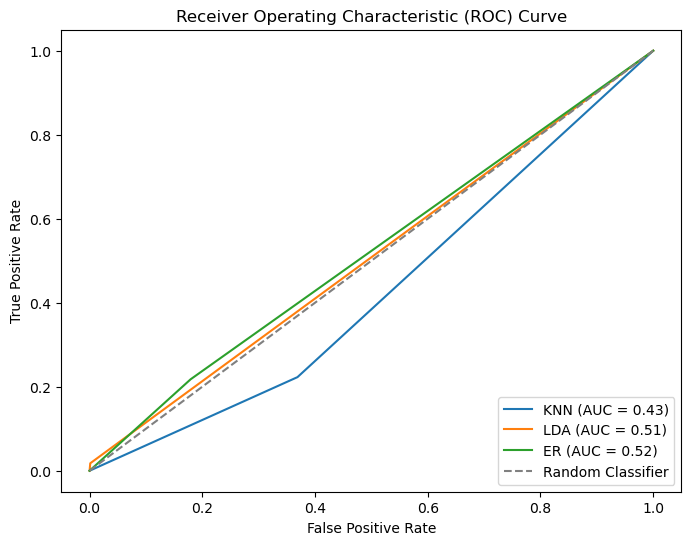

In [12]:
p_mods = [p_knn, p_lda, p_er]
mnames = ['KNN', 'LDA', 'ER']
plot_roc(p_mods, mnames)

Now that we've tried the hyperparameters in the paper, let's see if a grid search suggests different values.


In [52]:
# call grid search functions
best_lr_parms = get_best_lr_parms(X_smote, y_smote)
print('Best Linear Regression Hyperparameters:', best_lr_parms)

Best Linear Regression Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}


In [54]:
# Run time is too long with full SMOTE. Reducing the datat to get some parms
from sklearn.model_selection import train_test_split
X_train_knn_gs, _, y_train_knn_gs, _ = train_test_split(X_smote, y_smote, train_size=0.30, random_state=42)
X_train_knn_gs.shape


(150000, 21)

In [56]:
best_knn_parms = get_best_knn_parms(X_train_knn_gs, y_train_knn_gs)
print('Best KNN Hyperparameters:', best_knn_parms)

Best KNN Hyperparameters: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [53]:
best_lda_parms = get_best_lda_parms(X_smote, y_smote)
print('Best LDA Hyperparameters:', best_lda_parms)



C:\Users\cpiac\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\cpiac\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\cpiac\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not supported with 'svd' solver.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\

Best LDA Hyperparameters: {'covariance_estimator': None, 'n_components': None, 'priors': None, 'shrinkage': 'auto', 'solver': 'lsqr', 'store_covariance': True, 'tol': 0.0001}


Try the model again using the hyperparameters from the grid search

In [68]:
#best_lr_parms = {'copy_X': True, 'fit_intercept': True, 'positive': True}
best_knn_parms = {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
#best_lda_parms = {'covariance_estimator': None, 'n_components': None, 'priors': None,
#                  'shrinkage': 'auto', 'solver': 'lsqr', 'store_covariance': True, 'tol': 0.0001}


In [69]:
print(best_knn_parms)
print(best_lda_parms)
print(best_lr_parms)

{'algorithm': 'auto', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
{'covariance_estimator': None, 'n_components': None, 'priors': None, 'shrinkage': 'auto', 'solver': 'lsqr', 'store_covariance': True, 'tol': 0.0001}
{'copy_X': True, 'fit_intercept': True, 'positive': False}


Test Data Evaluation
Scores after training the models using under sampling of the Majority Class using Documented Model with
Hyperparameters Updated with Best Parameter Values Returned by Grid Search


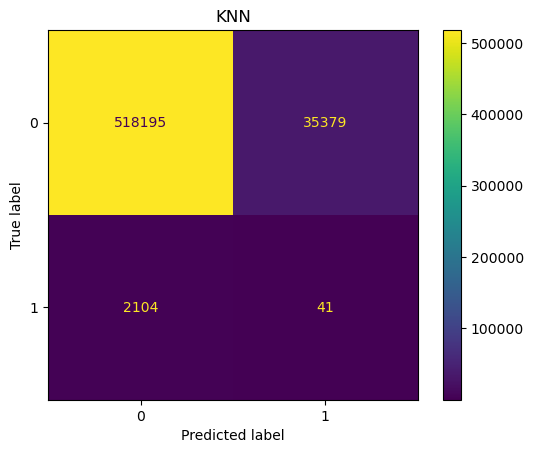

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.00      0.02      0.00      2145

    accuracy                           0.93    555719
   macro avg       0.50      0.48      0.48    555719
weighted avg       0.99      0.93      0.96    555719



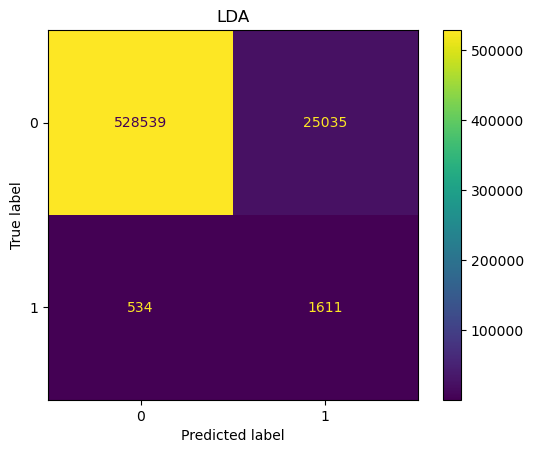

              precision    recall  f1-score   support

           0       1.00      0.95      0.98    553574
           1       0.06      0.75      0.11      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.85      0.54    555719
weighted avg       1.00      0.95      0.97    555719



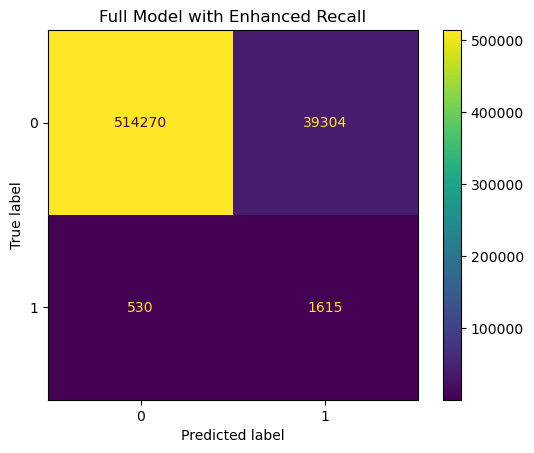

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    553574
           1       0.04      0.75      0.08      2145

    accuracy                           0.93    555719
   macro avg       0.52      0.84      0.52    555719
weighted avg       1.00      0.93      0.96    555719



In [70]:
# Create and train the ML models
p_knn, p_lda, p_lr = define_primary_models_tuned(X_smote, y_smote, X_test, best_knn_parms, best_lda_parms, best_lr_parms)
# Apply the enhanced recall logic
p_er = enhanced_recall(p_knn, p_lda, p_lr, p_lr.mean())

# test data eval
print("Test Data Evaluation")
print("Scores after training the models using under sampling of the Majority Class using Documented Model with")
print("Hyperparameters Updated with Best Parameter Values Returned by Grid Search")
cm_report = get_classifcation_report(y_test, p_knn, 'KNN')
print(cm_report)

cm_report = get_classifcation_report(y_test, p_lda, 'LDA')
print(cm_report)

cm_report = get_classifcation_report(y_test, p_er, 'Full Model with Enhanced Recall')
print(cm_report)         

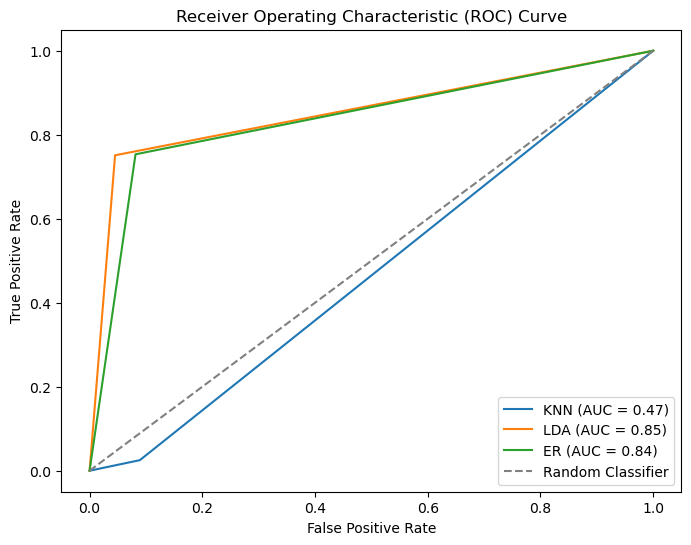

In [64]:
p_mods = [p_knn, p_lda, p_er]
mnames = ['KNN', 'LDA', 'ER']
plot_roc(p_mods, mnames)

Secondary Paper using undersampling of the majority class

Test Data Evaluation
Scores after using under sampling of the Minority Class using Documented Model and Hyperparameters


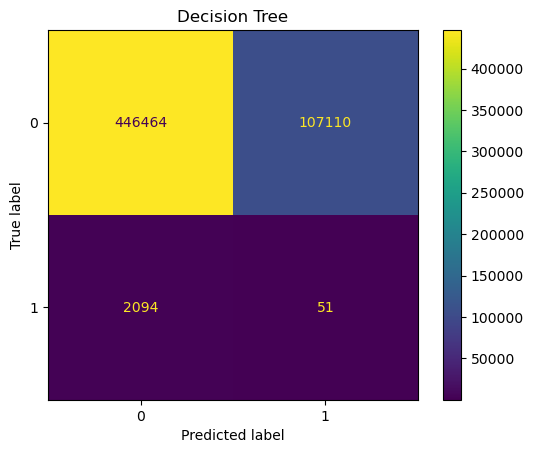

              precision    recall  f1-score   support

           0       1.00      0.81      0.89    553574
           1       0.00      0.02      0.00      2145

    accuracy                           0.80    555719
   macro avg       0.50      0.42      0.45    555719
weighted avg       0.99      0.80      0.89    555719



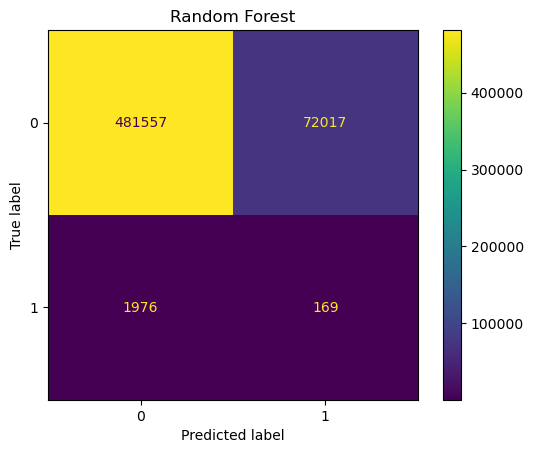

              precision    recall  f1-score   support

           0       1.00      0.87      0.93    553574
           1       0.00      0.08      0.00      2145

    accuracy                           0.87    555719
   macro avg       0.50      0.47      0.47    555719
weighted avg       0.99      0.87      0.93    555719



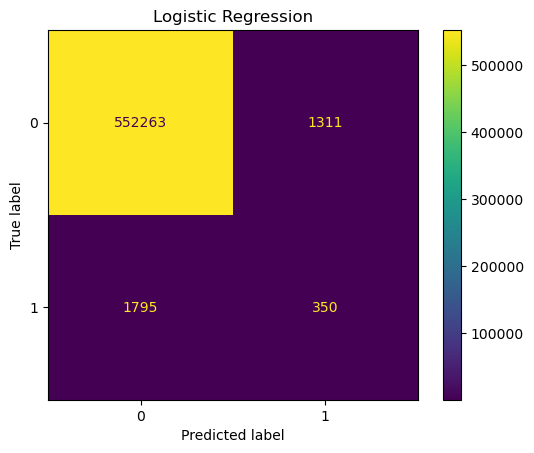

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.21      0.16      0.18      2145

    accuracy                           0.99    555719
   macro avg       0.60      0.58      0.59    555719
weighted avg       0.99      0.99      0.99    555719



In [48]:
# Create, train and test the ML models
p_dt, p_rf, p_log_r = define_secondary_models(X_train_u, y_train_u, X_test)

# test data eval
print("Test Data Evaluation")
print("Scores after using under sampling of the Minority Class using Documented Model and Hyperparameters")

cm_report = get_classifcation_report(y_test, p_dt, 'Decision Tree')
print(cm_report)

cm_report = get_classifcation_report(y_test, p_rf, 'Random Forest')
print(cm_report)

cm_report = get_classifcation_report(y_test, p_log_r, 'Logistic Regression')
print(cm_report)         

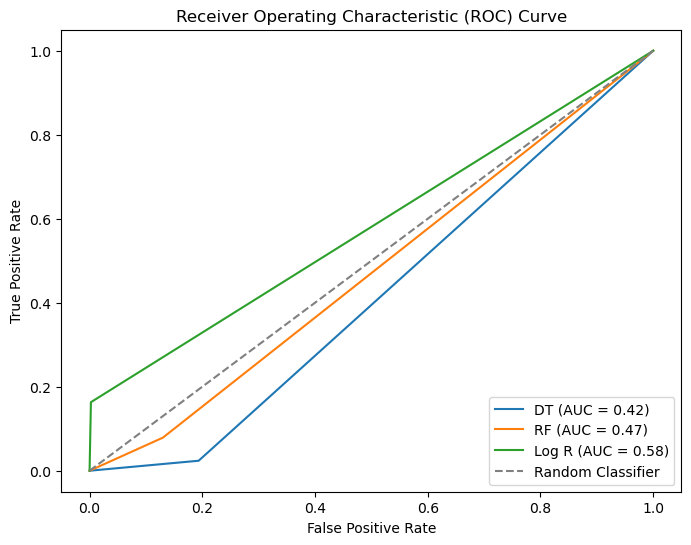

In [49]:
p_mods = [p_dt, p_rf, p_log_r]
mnames = ['DT', 'RF', 'Log R']
plot_roc(p_mods, mnames)

Secondary Paper using SMOTE Oversampling of the minority class

Test Data Evaluation
Scores after the Application of SMOTE Oversampling of the Minority Class using Documented Model and Hyperparameters


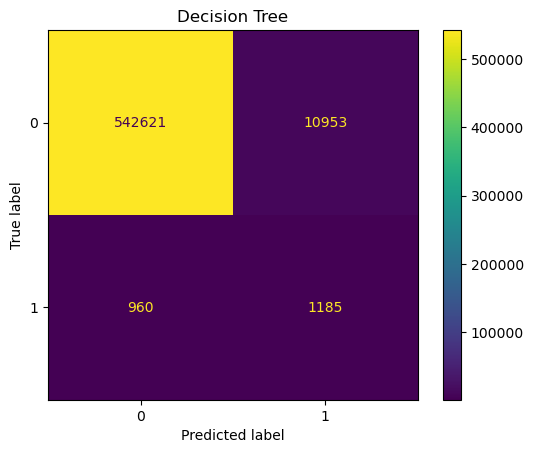

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.10      0.55      0.17      2145

    accuracy                           0.98    555719
   macro avg       0.55      0.77      0.58    555719
weighted avg       0.99      0.98      0.99    555719



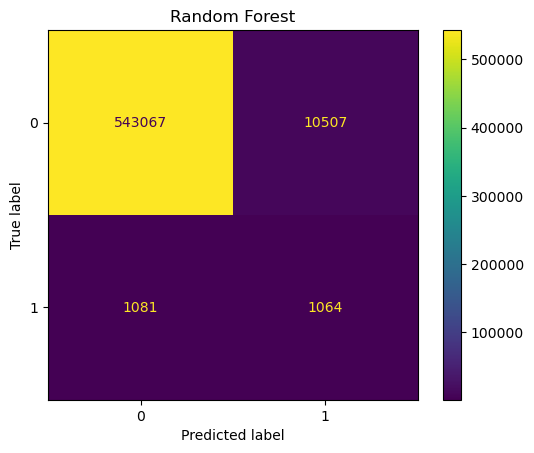

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.09      0.50      0.16      2145

    accuracy                           0.98    555719
   macro avg       0.54      0.74      0.57    555719
weighted avg       0.99      0.98      0.99    555719



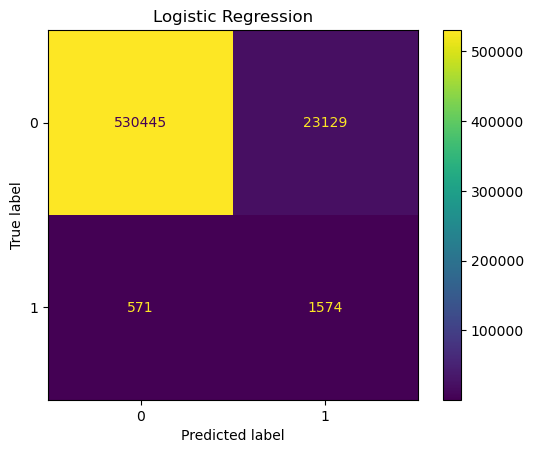

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.06      0.73      0.12      2145

    accuracy                           0.96    555719
   macro avg       0.53      0.85      0.55    555719
weighted avg       1.00      0.96      0.97    555719



In [50]:
# Create, train and test the ML models
p_dt, p_rf, p_log_r = define_secondary_models(X_smote, y_smote, X_test)

# test data eval
print("Test Data Evaluation")
print("Scores after the Application of SMOTE Oversampling of the Minority Class using Documented Model and Hyperparameters")

cm_report = get_classifcation_report(y_test, p_dt, 'Decision Tree')
print(cm_report)

cm_report = get_classifcation_report(y_test, p_rf, 'Random Forest')
print(cm_report)

cm_report = get_classifcation_report(y_test, p_log_r, 'Logistic Regression')
print(cm_report)         

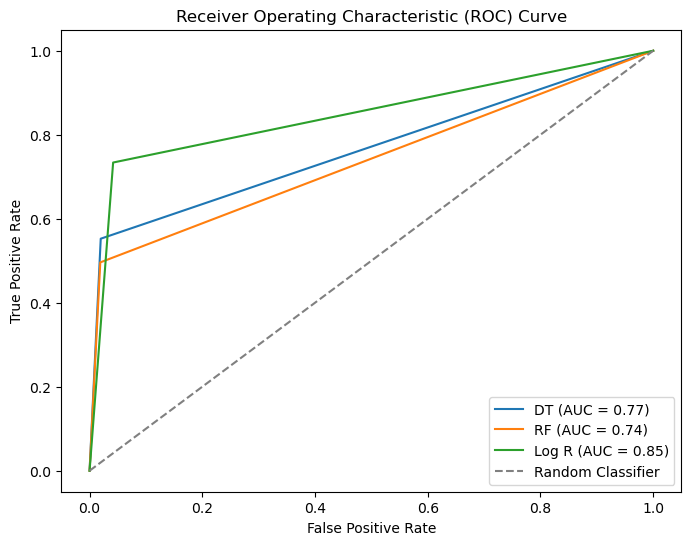

In [51]:
p_mods = [p_dt, p_rf, p_log_r]
mnames = ['DT', 'RF', 'Log R']
plot_roc(p_mods, mnames)

Try the tertiary paper's models using unbalanced data.

In [35]:
X_train_scaled.shape

(1296675, 21)

The paper only used 100K rows of the data for training so let's take a random 1% to approximate that.

In [37]:
from sklearn.model_selection import train_test_split
X_train_svm, _, y_train_svm, _ = train_test_split(X_train_scaled, y_train, train_size=0.01, random_state=42)
X_train_svm.shape

(12966, 21)

Test Data Evaluation


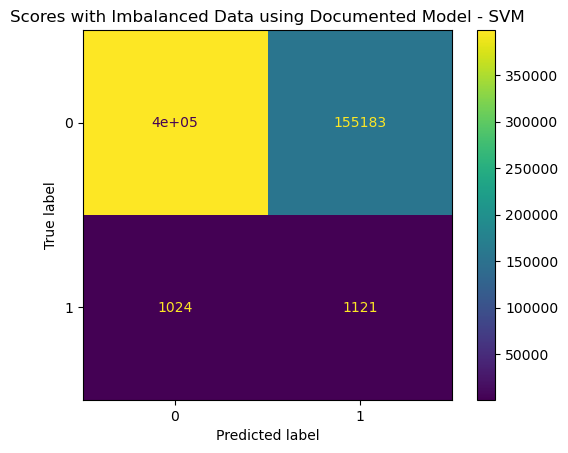

              precision    recall  f1-score   support

           0       1.00      0.72      0.84    553574
           1       0.01      0.52      0.01      2145

    accuracy                           0.72    555719
   macro avg       0.50      0.62      0.43    555719
weighted avg       0.99      0.72      0.83    555719



In [46]:

# Create, train and test the ML models
hyperparameters = {'C': 10.0, 'kernel': 'rbf', 'gamma': 0.01, 'class_weight': 'balanced'}
p_svm = define_tertiary_models(X_train_svm, y_train_svm, X_test, hyperparameters)

# test data eval
print("Test Data Evaluation")
cm_report = get_classifcation_report(y_test, p_svm, 'Scores with Imbalanced Data using Documented Model - SVM')
print(cm_report)

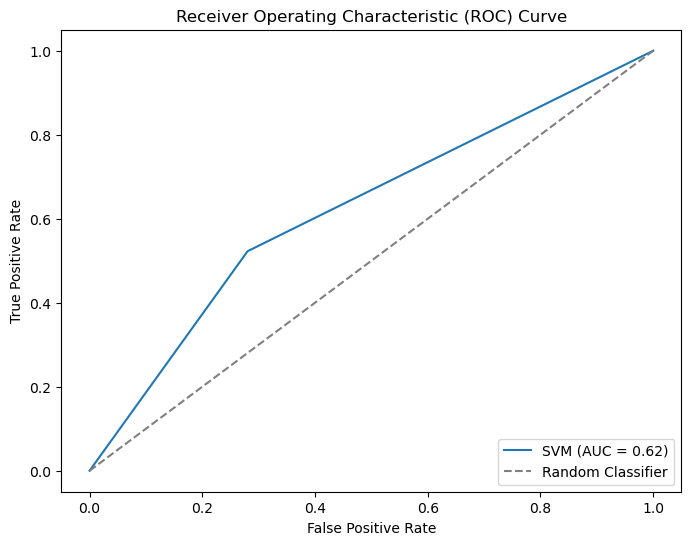

In [47]:
p_mods = [p_svm]
mnames = ['SVM']
plot_roc(p_mods, mnames)

Try the tertiary paper's models using SMOTE.  The paper indicated future experimentation with enlarged dataset and SMOTE.  Let's try that.

In [41]:
X_smote.shape

(500000, 21)

Test Data Evaluation


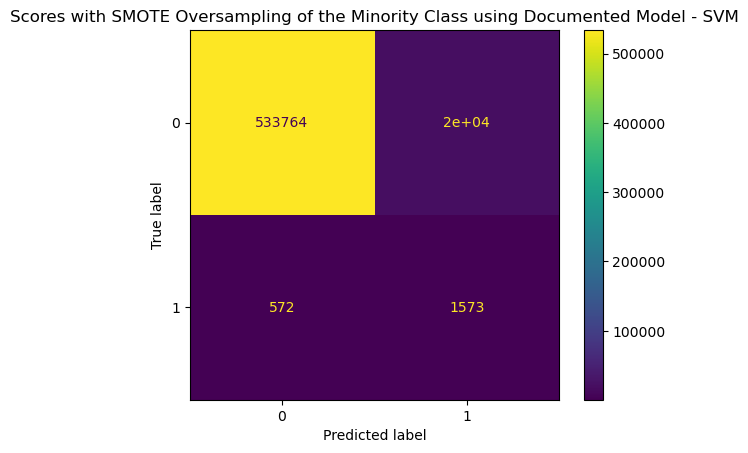

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.07      0.73      0.13      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.85      0.56    555719
weighted avg       1.00      0.96      0.98    555719



In [42]:
# Create, train and test the ML models
hyperparameters = {'C': 10.0, 'kernel': 'rbf', 'gamma': 0.01, 'class_weight': 'balanced'}
p_svm = define_tertiary_models(X_smote, y_smote, X_test, hyperparameters)

# test data eval
print("Test Data Evaluation")
cm_report = get_classifcation_report(y_test, p_svm, 'Scores with SMOTE Oversampling of the Minority Class using Documented Model - SVM')
print(cm_report)

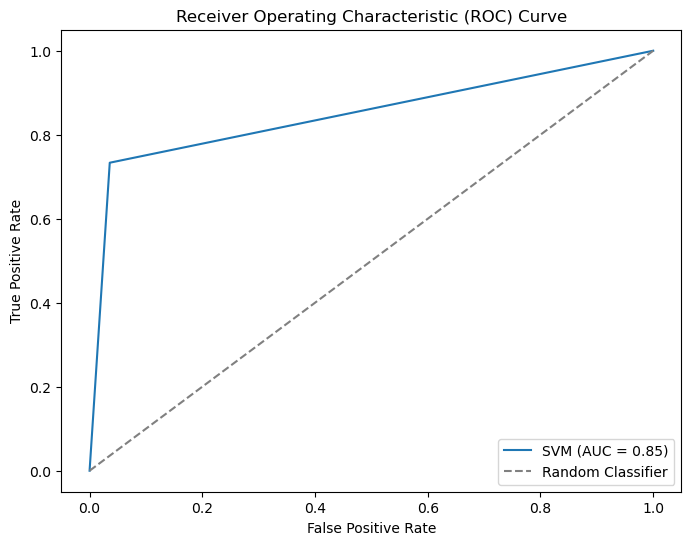

In [43]:
p_mods = [p_svm]
mnames = ['SVM']
plot_roc(p_mods, mnames)